#### Mutliple Linear regression - Economics Dataset

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [42]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [43]:
## Droping unnecessary columns 

df_index.drop(columns=["Unnamed: 0","year","month"], axis=1, inplace = True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [44]:
## checking for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

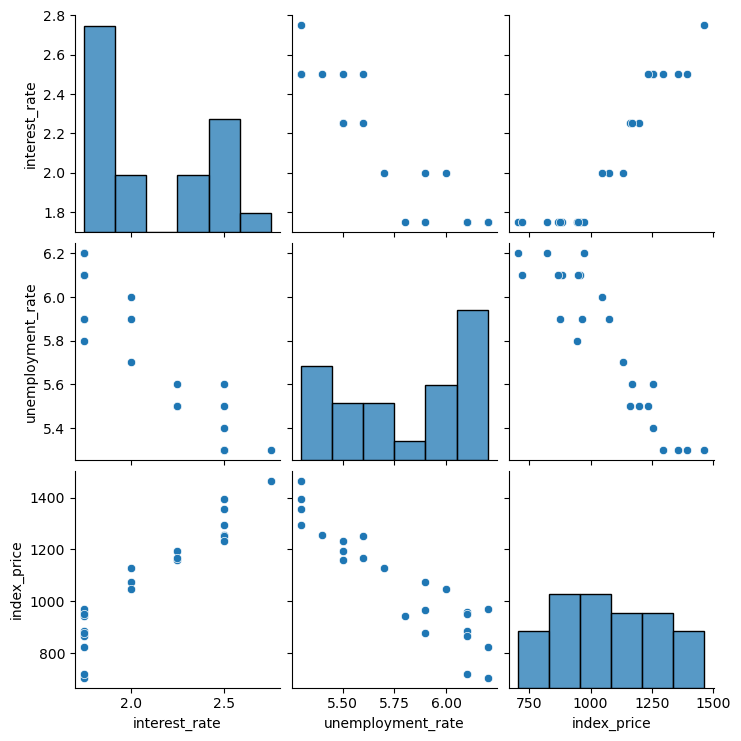

In [45]:
## Lets visualize the data more clearly to understand the data better
sns.pairplot(df_index)

In [46]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 1.0, 'interest_rate vs unemployment_rate')

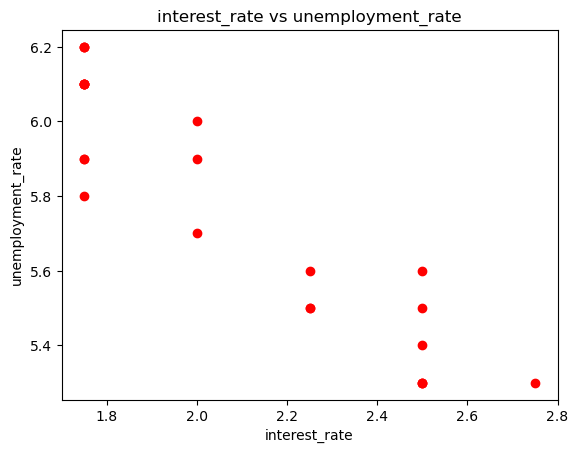

In [47]:
## visualizing the data points more closely

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.title('interest_rate vs unemployment_rate')


In [48]:
## independent and dependent features/variables
x = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [49]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [50]:
## Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 2), (6, 2), (18,), (6,))

In [51]:
x_train

,interest_rate,unemployment_rate
13,1.75,5.9
23,1.75,6.1
16,1.75,6.2
8,2.25,5.5
6,2.50,5.5
17,1.75,6.1
4,2.50,5.4
2,2.50,5.3
5,2.50,5.6
18,1.75,6.1


<Axes: xlabel='interest_rate', ylabel='index_price'>

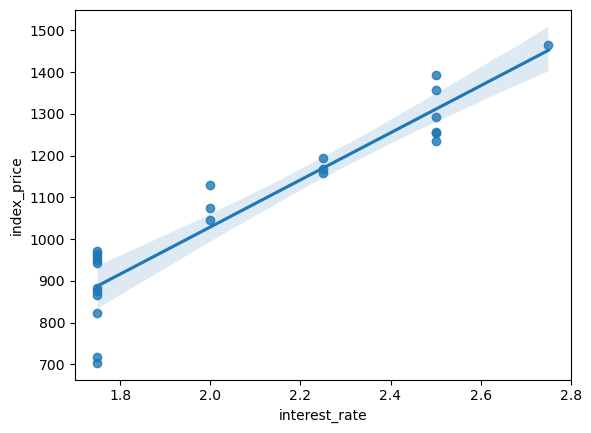

In [83]:
sns.regplot(x='interest_rate',y='index_price',data=df_index)


In [ ]:
## standardizing the data
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [53]:
x_train

array([[-1.01512945,  0.39413171],
       [-1.01512945,  0.98532928],
       [-1.01512945,  1.28092806],
       [ 0.3904344 , -0.78826342],
       [ 1.09321633, -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.08386221],
       [ 1.09321633, -1.37946099],
       [ 1.09321633, -0.49266464],
       [-1.01512945,  0.98532928],
       [ 0.3904344 , -0.49266464],
       [ 0.3904344 , -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.37946099],
       [ 1.79599826, -1.37946099],
       [-1.01512945,  1.28092806],
       [-1.01512945,  0.98532928],
       [-0.31234752,  0.68973049]])

In [54]:
## Alogrithm selection for data analysis
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [58]:
## cross validation 
from sklearn.model_selection import cross_val_score
validation_score= cross_val_score(estimator=regression,X=x_train,y=y_train,scoring="neg_mean_squared_error",cv=3)

In [59]:
np.mean(validation_score)

-3875.2750401898643

In [73]:
regression.coef_

array([140.34286806, -52.55792038])

In [60]:
## Prediction of the model
y_pred = regression.predict(x_test)
y_pred

array([1022.11617625, 1053.1882909 ,  876.8775728 ,  939.0218021 ,
        923.48574478, 1312.59338314])

In [67]:
## Performance metrics evaluation of the model

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)
print("R2 Score: ",r2)
print("Adjusted R2 Score: ",adjusted_r2)

Mean Squared Error:  7913.525322008846
Mean Absolute Error:  72.5739441988108
Root Mean Squared Error:  88.95799751573125
R2 Score:  0.8313408388278931
Adjusted R2 Score:  0.7189013980464884


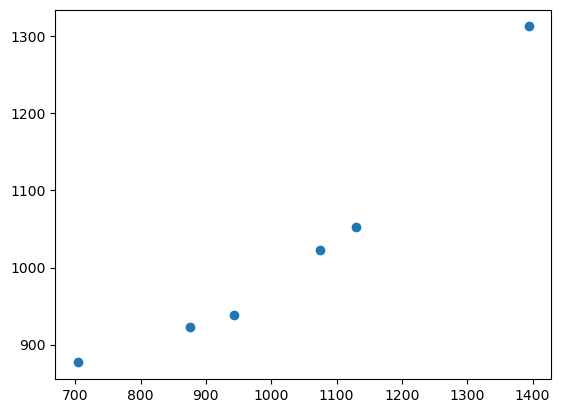

In [63]:
## Assumptions of linear regression

plt.scatter(y_test,y_pred)

In [64]:
residuals = y_test - y_pred
print(residuals)

11     52.883824
10     76.811709
22   -172.877573
14      3.978198
20    -47.485745
1      81.406617
Name: index_price, dtype: float64


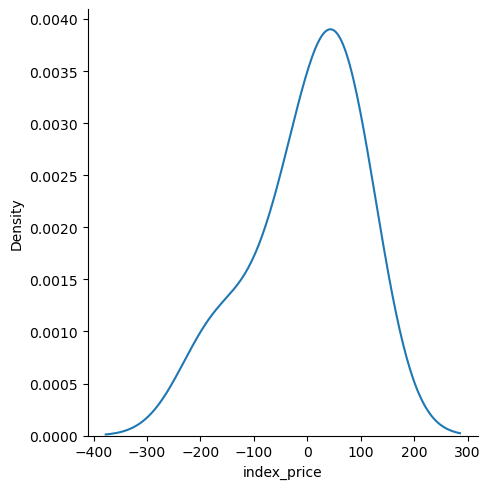

In [65]:
## plot this residuals 
sns.displot(residuals,kind='kde')

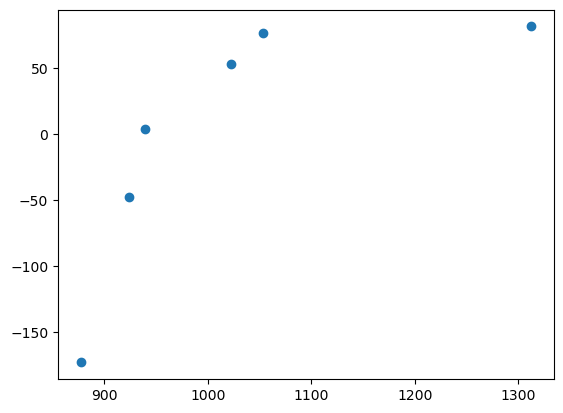

In [66]:
plt.scatter(y_pred,residuals)


In [69]:
## OLS linear regression
import statsmodels.api as sm 

In [70]:
model = sm.OLS(y_train,x_train).fit()

In [71]:
predictions = model.predict(x_test)
print(predictions)

[ -64.55049042  -33.47837577 -209.78909387 -147.64486456 -163.18092189
  225.92671647]


In [72]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                             0.2464
Date:                Sat, 10 May 2025   Prob (F-statistic):                       0.785
Time:                        14:35:40   Log-Likelihood:                         -151.40
No. Observations:                  18   AIC:                                      306.8
Df Residuals:                      16   BIC:                                      308.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
